# Computational Physics Assignment 5
## John Edwards

## Problem 1

Time to reach the Ground = 3.4089
Pick a time less than the max: 3.4089
Instant Speed (9.8100 m/s x 2.0000 Seconds) = 19.6200
Max Height = 57.0
Max Height Time = 0.0000


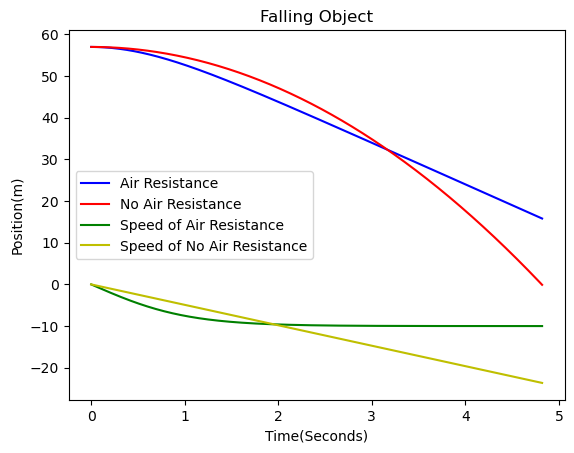

In [51]:
import numpy as np 
import matplotlib.pyplot as plt 

#initial params
g = 9.81
v0 = 0 #initial velocity in m/s
vt = 10  #terminal velocity
h = 0.01
v = v0
t = 0
y = 57

#create arrays 

tc = np.zeros(1)
yc = np.zeros(1)
nc = np.zeros(1)
gc = np.zeros(1)
dc = np.zeros(1)
tc[0] = 0
yc[0] = 57
nc[0] = 57
gc[0] = 0
dc[0] = 0


#defome acceleration function
def a(v):
    return -g*(1+v*abs(v)/vt**2)

def Huen(v):
    vend = v + a(v) *h
    v = v + (a(v) + a(vend))/2*h
    return v
    
def Huen_y(v,y): 
    y_end = y + v*h 
    y = y + (v+v)/2*h  
    return y 

def nonHuen(v):
    vend = v + -g *h
    v = v + -g/2*h
    return v
    
def nonHuen_y(v,y): 
    y_end = y + v*h 
    y = y + (v+v)/2*h  
    return y 



vair,yair,vnoair,ynoair = v,y,v,y
while ynoair >= 0:
    vair = Huen(vair)
    yair = Huen_y(vair, yair)
    vnoair = nonHuen(vnoair)
    ynoair = nonHuen_y(vnoair,ynoair)
    yc= np.append(yc,yair)
    nc = np.append(nc,ynoair)
    gc = np.append(gc,vair)
    dc = np.append(dc, vnoair)
    t = t + h
    tc = np.append(tc,t)
       
maxHeight = yc[np.argmax(yc)]
maxHeightTime = tc[np.argmax(yc)] 

time = 2
timeatground = np.sqrt(2*y/g)
instantspeed = g * time

print(f'Time to reach the Ground = {timeatground:.4f}')
print(f'Pick a time less than the max: {timeatground:.4f}\nInstant Speed ({g:.4f} m/s x {time:.4f} Seconds) = {instantspeed:.4f}')
print(f'Max Height = {maxHeight}\nMax Height Time = {maxHeightTime:.4f}')
plt.title('Falling Object')
plt.xlabel('Time(Seconds)')
plt.ylabel('Position(m)')
plt.plot(tc,yc,'b-', label='Air Resistance')
plt.plot(tc,nc,'r-', label='No Air Resistance')
plt.plot(tc, gc,'g-',label='Speed of Air Resistance')
plt.plot(tc,dc,'y-',label='Speed of No Air Resistance')
plt.legend()
plt.show()



## Problem 2


B.) The Max Range = 88.23(m)
A.) Greatest Angle for Launch = 42.0 (degrees)


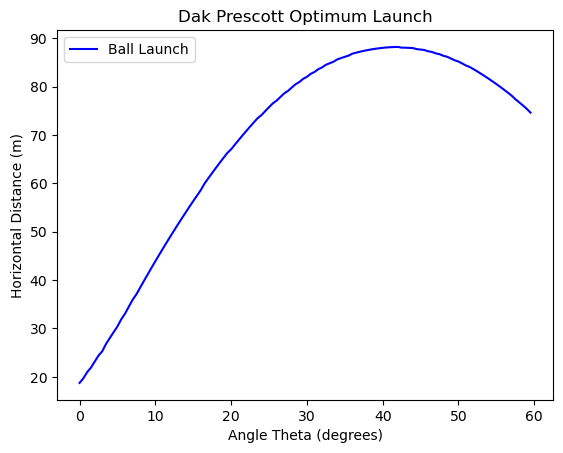

In [42]:
import numpy as np 
import matplotlib.pyplot as plt 

#initial params
g,v0,vt = 9.81 , 35, 45
h = dt = 0.01

#create arrays 

xc = np.zeros(0)
thetac = np.zeros(0)

v = v0
x = 0
y=1.5
t=0



#defome acceleration function
def ay(vy, v):
    return -g*(1+vy*v/vt**2)

def ax(vx, v):
    return -g*vx*v/vt**2

def Huen_vx(vx,v):
    vend = vx + ax(vx,v) *dt
    vx = vx + (ax(vx,v) + ax(vend, v))*dt/2
    return vx
    
def Huen_vy(vy,v): 
    y_end = vy + ay(vy,v)*h 
    vy = vy + (ay(vy,v)+ay(y_end,v))*dt/2
    return vy

def Huen(position,velocity):
    return position + velocity*h

def throw(vx,vy,v):
    t = 0
    y=1.5
    x = 0
    while y >= 0:
        vx = Huen_vx(vx,v)
        x = Huen(x, vx)
        vy = Huen_vy(vy,v)
        y = Huen(y,vy)
        v = np.sqrt(vx**2 + vy**2)
        t = t + h
    return x

#Loop over angles adn determine th range for each angle
for theta in np.arange(0, 60, 0.5):
    vx = v0*np.cos(theta*np.pi/180)
    vy = v0*np.sin(theta*np.pi/180)
    v = np.sqrt(vx**2 + vy**2)
    x = throw(vx,vy,theta)
    xc = np.append(xc,x)
    thetac = np.append(thetac,theta)
    
# xc = np.append(xc,x)    
maxDistanceAngle = thetac[np.argmax(xc)]
crange = xc[np.argmax(xc)]

# timeOfFlight = tc[np.argmax(xc)]
print(f'B.) The Max Range = {crange:.2f}(m)')
print(f'A.) Greatest Angle for Launch = {maxDistanceAngle} (degrees)')
# print(f'Max Height = {maxHeight}\n Max Height Time = {maxHeightTime}\n Range = {crange}\n Time of Flight = {timeOfFlight}')
plt.title('Dak Prescott Optimum Launch')
plt.xlabel('Angle Theta (degrees)')
plt.ylabel('Horizontal Distance (m)')
plt.plot(thetac,xc,'b-', label='Ball Launch')
plt.legend()
plt.show()

